# Procesamiento Digital de Audio
## Caleb Rascón
### Separación de Fuentes en Línea

#### PCA 

In [7]:
import numpy as np
from matplotlib import pyplot as plt
from trianglewave import trianglewave
from delay_f import delay_f

In [8]:
doa1 = 20 * np.pi/180  #direction of arrival of first signal
doa2 = -40 * np.pi/180 #direction of arrival of second signal

amp_out1 = .3     # pre amplification of first signal
amp_out2 = .7     # pre amplification of second signal

d = 4     #distance between microphones in meters
M = 8     #number of microphones

N = 200   #signal size in samples

In [9]:
# Parameters
doa1 = 20 * np.pi / 180  # direction of arrival of first signal
doa2 = -40 * np.pi / 180  # direction of arrival of second signal
amp_out1 = 0.3  # pre-amplification of first signal
amp_out2 = 0.7  # pre-amplification of second signal
d = 4  # distance between microphones in meters
M = 8  # number of microphones
N = 200  # signal size in samples

# Simulating signals
t = np.arange(1, N + 1) / N  # time vector (1 second)
c = 343  # speed of sound
fs = N  # sampling frequency same as signal size (1 second)

# Original signals
s1 = np.cos(2 * np.pi * 2 * t)
s2 = trianglewave(10, N) * 0.5


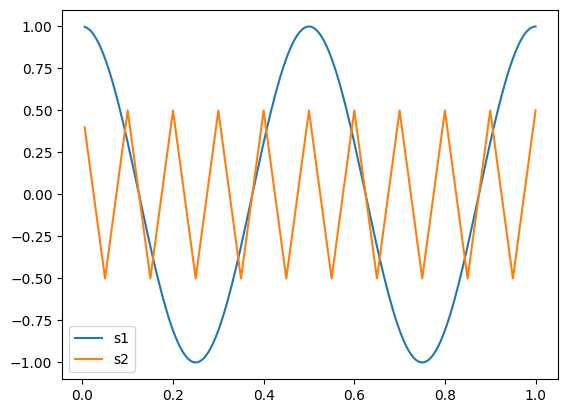

In [10]:

# Microphones (input signals)
X = np.zeros((M, N))
X[0, :] = s1 + s2
for m in range(1, M):
    X[m, :] = delay_f(s1, (m * d / c) * np.sin(doa1), N) + delay_f(s2, (m * d / c) * np.sin(doa2), N)

plt.plot(t, s1, label='s1')
plt.plot(t, s2, label='s2')
plt.legend()
plt.show()

(0.0, 1.0, -1.0, 1.0)

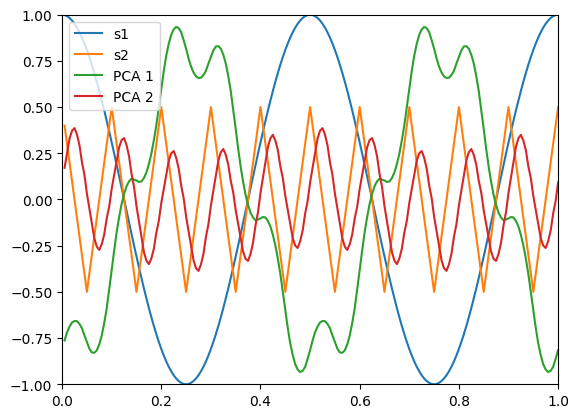

In [11]:

plt.plot(t, s1, label='s1')
plt.plot(t, s2, label='s2')
plt.plot(t, o[0, :] * amp_out1, label='PCA 1')
plt.plot(t, o[2, :] * amp_out2, label='PCA 2')
plt.legend()
plt.axis([0, 1, -1, 1])


In [12]:

# Centering data
for m in range(M):
    X[m, :] -= np.mean(X[m, :])

R = X @ X.T

D, V = np.linalg.eig(R)
I = np.argsort(D)[::-1]
V = V[:, I]

o = V.T @ X


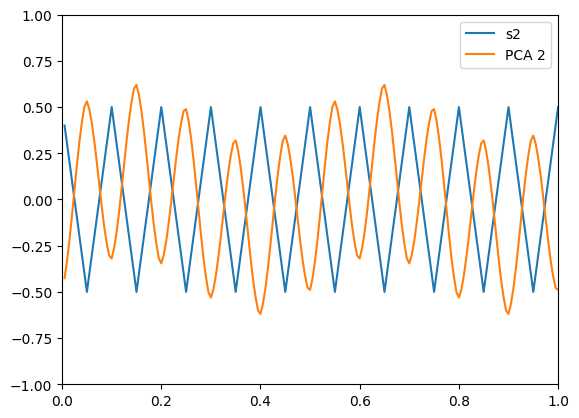

In [13]:
plt.plot(t, s2, label='s2')
plt.plot(t, o[1, :] * 0.5, label='PCA 2')
plt.legend()
plt.axis([0, 1, -1, 1])

plt.show()
